In [2]:
import pandas as pd

C:\Users\hamza\AppData\Local\Temp\ipykernel_20460\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# df = pd.read_csv('players_blegium_japan.csv')
# df = pd.read_csv('fifaplayers.csv')
# df = pd.read_csv('timestampplayers.csv')
df = pd.read_csv('playersNball.csv')
df

,id,teamId,frame,x,y,ball_posession,timestamp,ball_x,ball_y
0,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,29,-1,0,0.00,29,81
1,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,46,55,0,0.00,29,81
2,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,51,49,0,0.00,29,81
3,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,54,75,0,0.00,29,81
4,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,32,37,0,0.00,29,81
...,...,...,...,...,...,...,...,...,...
33049,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,20,60,0,24.14,12,49
33050,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Green,1660,23,49,0,24.14,12,49
33051,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,35,40,0,24.14,12,49
33052,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,18,55,0,24.14,12,49


In [32]:
#min of the column
minballx=df['ball_x'].min()
maxballx=df['ball_x'].max()
minbally=df['ball_y'].min()
maxbally=df['ball_y'].max()
df['ball_x']=df['ball_x']-minballx

if minbally<0:
    df['ball_y']=df['ball_y']-minbally  
if maxbally>80:
    df['ball_y']=df['ball_y']-(maxbally-80)
if maxballx>120:
    df['ball_x']=df['ball_x']-(maxballx-120)

In [42]:
print(df['ball_x'].min())

0


In [44]:
df.to_csv('playersNball.csv', index=False)

In [46]:
import pandas as pd

# Define the rectangles as polygons
sixyard_left = [(0, 50), (5, 50), (5, 30),  (0, 30),]
sixyard_right = [(114, 30), (120, 30), (120, 50), (114, 50)]
goal_left_points = [(0, 35), (0, 45), (2, 35), (2, 45)]
goal_right_points = [(118, 35), (120, 35), (118, 45), (120, 45)]

# Determine the ranges for the rectangles
left_x_min = min(point[0] for point in goal_left_points)
left_x_max = max(point[0] for point in goal_left_points)
left_y_min = min(point[1] for point in goal_left_points)
left_y_max = max(point[1] for point in goal_left_points)

right_x_min = min(point[0] for point in goal_right_points)
right_x_max = max(point[0] for point in goal_right_points)
right_y_min = min(point[1] for point in goal_right_points)
right_y_max = max(point[1] for point in goal_right_points)

# Function to check if a point is inside a rectangle (polygon)
def is_inside_polygon(x, y, polygon):
    n = len(polygon)
    inside = False
    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside



# Add columns for shot and goal
shot=[]
goal=[]
starting_points = []
ending_points = []
pass_completions = []
team=[]
ts=[]
# Iterate through the DataFrame to check for shots and goals
# Iterate through the DataFrame
i=0
while i < len(df):
    if df.loc[i, 'ball_posession'] == 1:
        # print(df.loc[i])
        # print("first i: ", i)
        start_frame = df.loc[i, 'frame']
        for j in range(i + 1, len(df)):
            if df.loc[j, 'frame'] == start_frame:
                continue
            if is_inside_polygon(df.loc[j, 'ball_x'], df.loc[j, 'ball_y'], sixyard_left) or is_inside_polygon(df.loc[j, 'ball_x'], df.loc[j, 'ball_y'], sixyard_right):
                if (df.loc[i,'timestamp']) in ts:
                    continue
                else:
                    shot.append(1)
                    starting_points.append((df.loc[i, 'x'], df.loc[i, 'y']))
                    print("j",j)
                    print("i",i)
                    ending_points.append((df.loc[j, 'ball_x'], df.loc[j, 'ball_y']))
                    team.append(df.loc[i, 'teamId'])
                    ts.append(df.loc[i,'timestamp'])
                    # Checking if the ball is within any of the rectangles
                    if ((left_x_min <= df.loc[j, 'ball_x'] <= left_x_max and left_y_min <= df.loc[j, 'ball_y'] <= left_y_max) or
                        (right_x_min <= df.loc[j, 'ball_x'] <= right_x_max and right_y_min <= df.loc[j, 'ball_y'] <= right_y_max)):
                        goal.append(1)
                    else:
                        goal.append(0)
            # Stop searching if ball possession changes to 1 again
            if df.loc[j, 'ball_posession'] == 1:
                i = j-1
                # print("tu hai kaha")
                break
    i += 1
    # print("secibd i: ", i)



# Create DataFrame
df_fin = pd.DataFrame({
    "Starting_Point": starting_points,
    "Ending_Point": ending_points,
    "Team": team,
    "Shot": shot,
    "Goal": goal,
    "Time Stamp":ts    
}) 

print(df_fin)


j 29639
i 29336
j 32237
i 31148
  Starting_Point Ending_Point  Team  Shot  Goal  Time Stamp
0       (27, 57)      (5, 42)  Blue     1     0       21.10
1       (29, 45)      (1, 42)  Blue     1     1       22.52


In [38]:
df_fin.to_csv('shots.csv', index=False)

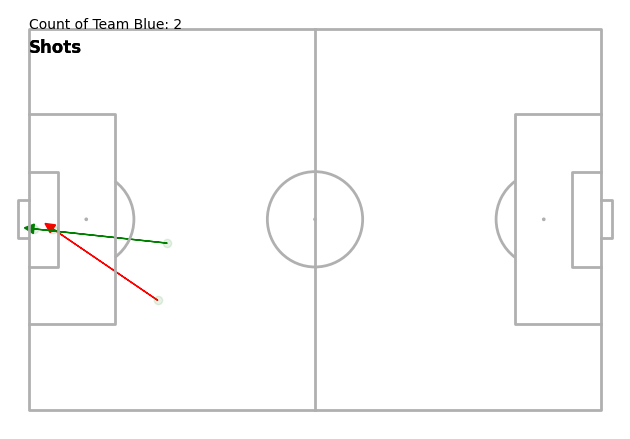

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Assuming you have already created a plot named 'ax'
pitch = Pitch(goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in df_fin.iterrows():
    # if row['Team'] == 'Blue':
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            goal = row['Goal']  # Pass completion status
            # Plotting arrows and scatter points
            if goal:
                ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                        color="green", alpha=1,
                        head_width=2, head_length=2, zorder=0)  # Adjust head width and length as needed
                ax.scatter(x_start, y_start, color="green", zorder=1, alpha=0.1)
                ax.scatter(x_end, y_end, color="green", zorder=1, alpha=0.1)
                c=c+1
            # Add text annotation for "Passes Completed" heading and count of passes completed
            else:
                ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                        color="red", alpha=1,
                        head_width=2, head_length=2, zorder=0)  # Adjust head width and length as needed
                ax.scatter(x_start, y_start, color="green", zorder=1, alpha=0.1)
                ax.scatter(x_end, y_end, color="green", zorder=1, alpha=0.1)
                c=c+1
            # Add text annotation for "Passes Completed" heading and count of passes completed
            ax.text(0, 5, "Shots", fontsize=12, color='black', weight='bold')
                

ax.text(0, 0, f"Count of Team Blue: {c}", fontsize=10, color='black')

plt.show()  # Show the plot
